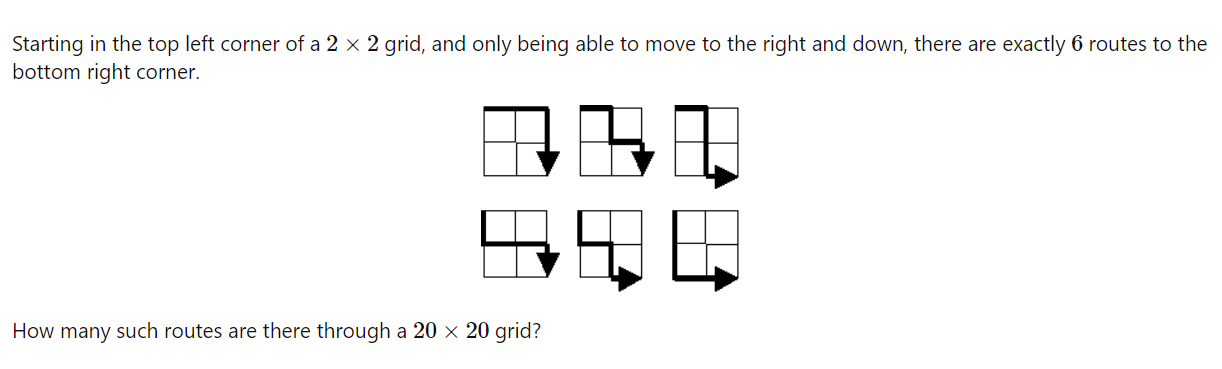

In [1]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%time
width = 21
height = 21

def calc_paths(width, height):
    paths = np.zeros((width,height))
    paths[0][0] = 1
    for i in range(width):
        for j in range(height):
            # we add paths[i][j] to the sum so that the initial node does not have its count set to 0
            paths[i][j] = paths[i-1][j] + paths[i][j-1] + paths[i][j]
    return paths

paths = calc_paths(width, height)
print(int(paths[-1][-1]))

137846528820
CPU times: user 142 µs, sys: 174 µs, total: 316 µs
Wall time: 307 µs


Explanation:

Notice that the number of paths to a node A is the sum of the number of paths to nodes with edges to node A (see illustration below). Since the edges to nodes only point down or right we can interate through the grid of nodes from top to bottom and left to right and the number of paths to a node will be the sum of the number of paths to the nodes left and above each node we interate through (we set node 0,0 to have 1 path to in initially).

This algorithm could be generalized to work for graphs that are not grid shaped (strictly moving down and right) by using a breadth first search approach to iterate through the nodes.

For this specific type of graph there is also a combinatorial solution. For an m x n graph we can find the number of paths to the bottom right node with this formula

\begin{equation}
{m+n \choose m} = \dfrac{(m+n)!} {m!*m!} 
\end{equation}*}*}

In [3]:
# We subtract 1 from width and height because the solution above uses a 21x21 graph to solve for what the original problem calls a 20x20 grid.
width -= 1
height -= 1

print(math.comb(width+height,width))

137846528820


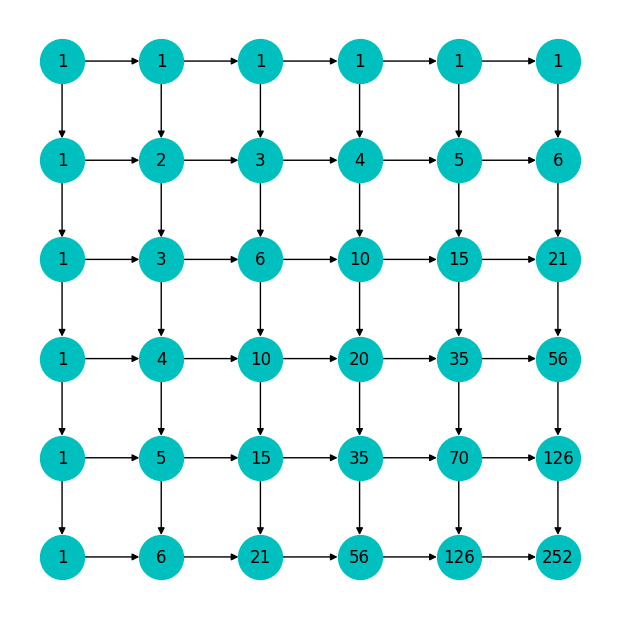

In [4]:
width = 6
height = 6

pos = {}
G1 = nx.DiGraph()
for i in range(width):
    for j in range(height):
        node = f"{i}_{j}"
        G1.add_node(node, num_paths=f"{int(paths[i][j])}")
        if i + 1 < width:
            G1.add_edge(node, f"{i+1}_{j}")
        if j + 1 < height:
            G1.add_edge(node, f"{i}_{j+1}")
        pos[node] = (i, width-j)

options = {
    'node_color': 'c',
    'node_size': 1000,
    'width': 1,
}
plt.figure(3,figsize=(width,height)) 
labels = nx.get_node_attributes(G1, 'num_paths') 
nx.draw(G1, pos=pos, labels=labels, with_labels=True, **options)
plt.show()

This is an attempt to perform a breadth first search of the graph to discover all paths to the bottom right node and count them. The  time to find all the paths grows exponentially and this algorithm is too slow for graphs larger than approximately 12x12.

In [5]:
%%time

global path_count 
path_count = 0
def BFS(graph, starting_node, ending_node):
    _BFS(graph, starting_node, ending_node)

def _BFS(graph, current_node, goal_node):
    if current_node == goal_node:
        global path_count
        path_count += 1
        return
    else:
        for edge in graph.edges(current_node):
            _BFS(graph, edge[1], goal_node)

BFS(G1, "0_0", f"{width-1}_{height-1}")
print(path_count)

252
CPU times: user 519 µs, sys: 600 µs, total: 1.12 ms
Wall time: 1.12 ms
